In [1]:
from ontolgyAlignment import OntologyAlignment
import os

c:\Users\romul\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\romul\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
SIMILARITY = "Jaro-Winkler"

In [3]:
HUMAN_OWL_PATH = os.getcwd()  + "\\ontologies\\anatomy\\human.owl"
MOUSE_OWL_PATH = os.getcwd()  + "\\ontologies\\anatomy\\mouse.owl"

OA = OntologyAlignment(HUMAN_OWL_PATH, MOUSE_OWL_PATH)

c:\Users\romul\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\romul\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [4]:
scores = OA.compute_lexical_similarity()

In [5]:
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [6]:
sorted_scores

[(('anatomic structure or substance system', 'mouse anatomy'), 1.0),
 (('anatomic structure or substance system', 'matter grey cord spinal'), 1.0),
 (('anatomic structure or substance system', 'matter grey'), 1.0),
 (('anatomic structure or substance system', 'cord spinal'), 1.0),
 (('anatomic structure or substance system', 'adult mouse'), 1.0),
 (('anatomic structure or substance system', 'trunk'), 1.0),
 (('anatomic structure or substance system', 'body lining cavity'), 1.0),
 (('anatomic structure or substance system', 'neck head'), 1.0),
 (('anatomic structure or substance system', 'limb'), 1.0),
 (('anatomic structure or substance system', 'tail'), 1.0),
 (('anatomic structure or substance system', 'adipose tissue'), 1.0),
 (('anatomic structure or substance system', 'tissue connective'), 1.0),
 (('anatomic structure or substance system', 'muscle'), 1.0),
 (('anatomic structure or substance system', 'sensory organ'), 1.0),
 (('anatomic structure or substance system', 'back'), 1.0

In [7]:
full_alignment = len(list(filter(lambda x: x[1] == 1, sorted_scores)))
above_75 = len(list(filter(lambda x: x[1] >= 0.75, sorted_scores)))
above_50 = len(list(filter(lambda x: x[1] >= 0.5, sorted_scores)))
above_25 = len(list(filter(lambda x: x[1] >= 0.25, sorted_scores)))
bellow_25 = len(list(filter(lambda x: x[1] < 0.25, sorted_scores)))
total = len(sorted_scores)

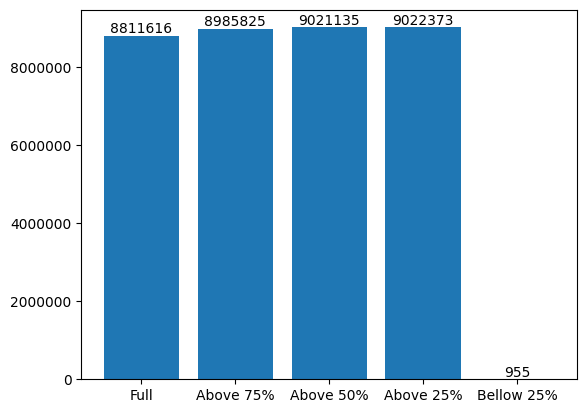

In [8]:
import matplotlib.pyplot as plt

labels = ['Full', 'Above 75%', 'Above 50%', 'Above 25%', 'Bellow 25%']
sizes = [full_alignment, above_75, above_50, above_25, bellow_25]

plt.bar(labels, sizes)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

for i in range(len(labels)):
    plt.text(labels[i], sizes[i], str(sizes[i]), ha='center', va='bottom')

plt.show()

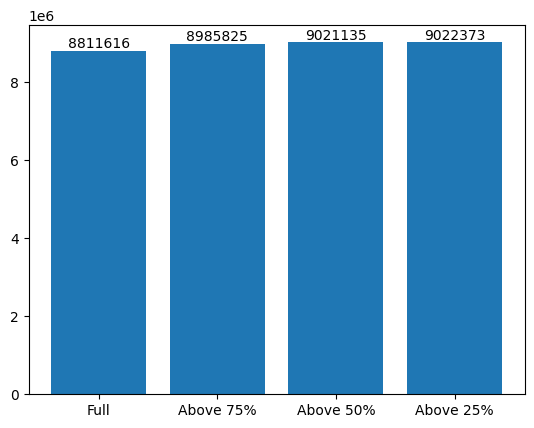

In [9]:
# Remove the bellow 25% 

plt.bar(labels[:-1], sizes[:-1])
for i in range(len(labels) - 1):
    plt.text(labels[i], sizes[i], str(sizes[i]), ha='center', va='bottom')

plt.show()


# Embeddings

In [10]:
OA.string_embedding.keys()

dict_keys(['leg nerve', 'lateral preoptic area', 'phrenic nerve', 'utero vesical pouch', 'carpometacarpal joint', 'temporal vein', 'upper jaw tooth', 'pelvis skin', 'macrophage', 'thymic lymphoid tissue', 'pulmonary lobule', 'metacarpal metatarsal bone', 'midgut', 'ventrolateral nucleus of the thalamus', 'mature t lymphocyte', 'other body part', 'innominate artery branch', 'thorax blood vessel', 'lymph node follicle', 'olfactory bulb glomerular layer', 'larynx mucous gland', 'prepuce', 'intercalated disk', 'intermediate cuneiform', 'bladder tissue', 'urinary system', 'bladder muscular coat', 'iliac vein', 'accessory nerve', 'c3 vertebra', 'submucosa', 'immature peripheral alpha beta cell of cytotoxic type', 'lower jaw molar', 'proximal convoluted tubule convoluted part', 'round ligament', 'apex of the heart', 'abdomen muscle', 'parathyroid gland clear cell', 'posterior wall of the nasopharynx', 'meniscus medialis', 'glomerular visceral epithelium', 'nerve tissue and nerve sheaths', 'up

In [11]:
scores_embeddings = OA.compute_embedding_similarity()

In [12]:
scores_embeddings

{('anatomic structure system or substance',
  'mouse anatomy'): 0.29381847381591797,
 ('anatomic structure system or substance',
  'spinal cord grey matter'): 0.2933008372783661,
 ('anatomic structure system or substance', 'grey matter'): 0.2294958233833313,
 ('anatomic structure system or substance',
  'spinal cord'): 0.24471862614154816,
 ('anatomic structure system or substance', 'organ system'): 0.545377790927887,
 ('anatomic structure system or substance',
  'adult mouse'): 0.04730457440018654,
 ('anatomic structure system or substance', 'trunk'): 0.23788446187973022,
 ('anatomic structure system or substance',
  'anatomic region'): 0.5511029958724976,
 ('anatomic structure system or substance',
  'body cavity lining'): 0.4037581980228424,
 ('anatomic structure system or substance', 'head neck'): 0.22247396409511566,
 ('anatomic structure system or substance', 'limb'): 0.21499770879745483,
 ('anatomic structure system or substance', 'tail'): 0.020155636593699455,
 ('anatomic struc

In [13]:
sorted_scores_embeddings = sorted(scores_embeddings.items(), key=lambda x: x[1], reverse=True)

In [14]:
sorted_scores_embeddings

[(('right main bronchus', 'right main bronchus'), 1.0000003576278687),
 (('tongue', 'tongue'), 1.000000238418579),
 (('small intestine', 'small intestine'), 1.000000238418579),
 (('cartilage', 'cartilage'), 1.000000238418579),
 (('prepuce', 'prepuce'), 1.000000238418579),
 (('penis', 'penis'), 1.000000238418579),
 (('glans penis', 'glans penis'), 1.000000238418579),
 (('ciliary body', 'ciliary body'), 1.000000238418579),
 (('striated muscle tissue', 'striated muscle tissue'), 1.000000238418579),
 (('blood vessel', 'blood vessel'), 1.000000238418579),
 (('anus', 'anus'), 1.000000238418579),
 (('liver', 'liver'), 1.000000238418579),
 (('cochlea', 'cochlea'), 1.000000238418579),
 (('thyroid gland', 'thyroid gland'), 1.000000238418579),
 (('ureter', 'ureter'), 1.000000238418579),
 (('nasal cavity', 'nasal cavity'), 1.000000238418579),
 (('salivary gland', 'salivary gland'), 1.000000238418579),
 (('respiratory system', 'respiratory system'), 1.000000238418579),
 (('limb', 'limb'), 1.0000002